In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('/Users/varya_hai/Karpov.courses/lesson_3_data_1_.csv',encoding='windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
round(df.uni.value_counts()/len(df)*100,2).reset_index()

,uni,count
0,1.0,83.79
1,2.0,13.67
2,3.0,1.48
3,4.0,0.65
4,5.0,0.16
5,6.0,0.14
6,-1.0,0.03
7,8.0,0.02
8,-2.0,0.01
9,7.0,0.01


In [5]:
df['brand_name'] = df.art_sp.apply(lambda x: x.split()[-1])

In [6]:
int(df.brand_name.value_counts().max() / len(df.brand_name) * 100)

54

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


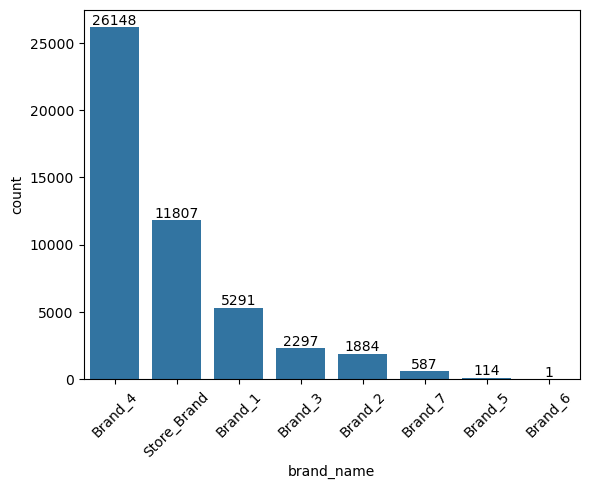

In [24]:
count_brand = df.brand_name.value_counts().reset_index()

ax = sns.barplot(x='brand_name',y='count',data=count_brand)
ax.tick_params(rotation=45,axis='x')
ax.bar_label(ax.containers[0])
ax.legend().remove()

In [1]:
def read_n_agg(path_to_file):
    df = pd.read_csv(path_to_file, sep=';')
    return (df.groupby('company')
              .agg({'income':'mean'}))

In [ ]:
path_to_file = ''
taxi = pd.read_csv(path_to_file,parse_dates=['start_at','end_at','arrived_at'])

In [ ]:
int(taxi.source.value_counts().max() / len(taxi) * 100)

In [ ]:
source_counts = taxi.soource.value_counts().reset_index().rename(columns={'source':'count','index':'source'})
source_counts

ax = sns.barplot(x='source',y='count',data=source_counts)

In [ ]:
ax = sns.countplot(taxi['icon'])

In [ ]:
driver_score_counts = round(taxi.driver_score.value_counts() / len(taxi) * 100,2).reset_index().rename(columns={'driver_score':'percentage','index':'driver_score'}).sort_values(by='driver_score')

# Минипроект

In [26]:
logs = pd.read_csv('/Users/varya_hai/Karpov.courses/3_logs.csv')
user_data = pd.read_csv('/Users/varya_hai/Karpov.courses/3_user_data.csv')

In [27]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [28]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [29]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [30]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [31]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [32]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [33]:
count_success = logs\
    .groupby('client',as_index=False)\
    ['success']\
    .sum()

max_success = count_success\
    .success\
    .max()

max_success_clients = logs\
    .groupby('client',as_index=False)\
    ['success']\
    .sum()\
    .query('success==@max_success')\
    .sort_values('client')\
    .client
print(*max_success_clients,sep=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


In [34]:
logs.groupby('platform',as_index=False)['success'].sum().sort_values('success',ascending=False).head(1)

,platform,success
1,phone,2019


In [35]:
logs[logs.success==True].platform.value_counts().idxmax()

'phone'

In [36]:
logs\
    .merge(user_data,on='client',how='right')\
    .groupby('platform',as_index=False)\
    ['premium']\
    .sum()\
    .sort_values('premium',ascending=False)\
    .head(1)

,platform,premium
1,phone,246


In [37]:
logs\
    .merge(user_data,on='client',how='right')\
    .query('premium==True')\
    .platform\
    .value_counts()\
    .idxmax()

'phone'

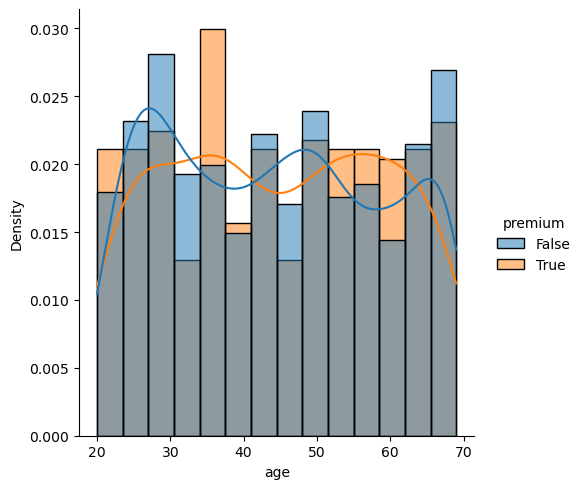

In [38]:
premium_logs = logs.merge(user_data,on='client')
sns.displot(premium_logs,x='age',hue='premium',kde=True,kind='hist',stat='density',
           common_norm=False,bins=14)